<a href="https://colab.research.google.com/github/sekjabirhosen/Breast-Cancer-Prediction-/blob/main/student_Depression_Analysiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/student_depression_dataset.csv')

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull().sum()


,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df['Gender'].unique()  # Do this for all categorical columns


array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Repeat for other categorical variables


In [ ]:
df.describe()


,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,0.557220,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,0.496724,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,0.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,1.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,1.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,1.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


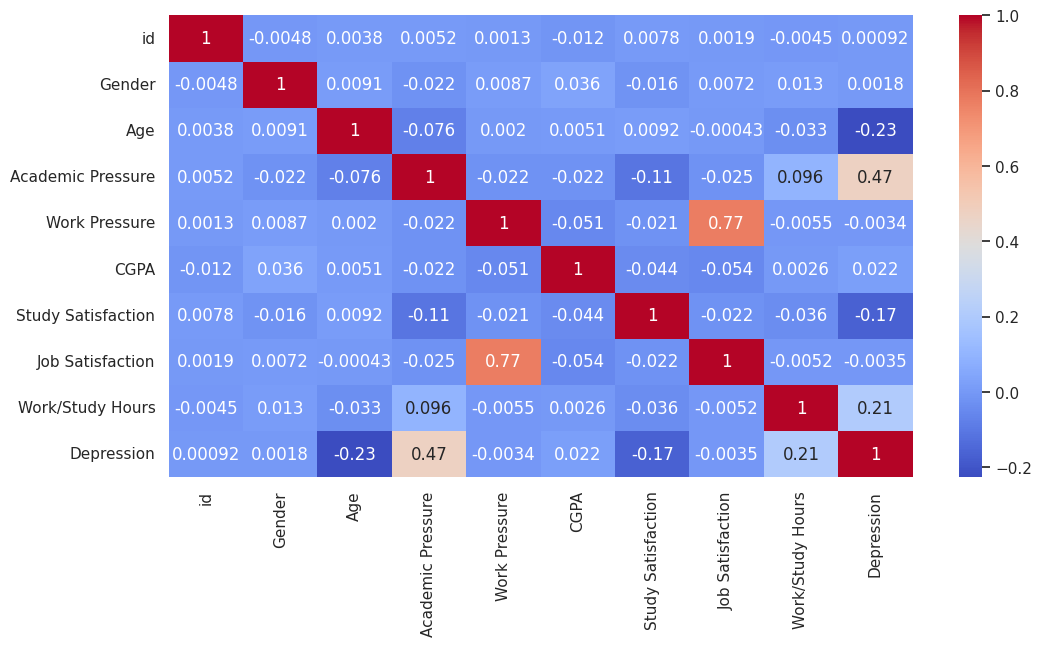

In [ ]:

numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

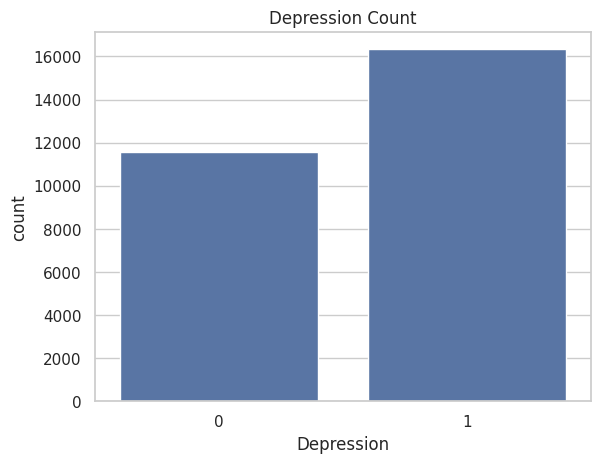

In [ ]:
sns.countplot(x=df['Depression'])
plt.title("Depression Count")
plt.show()


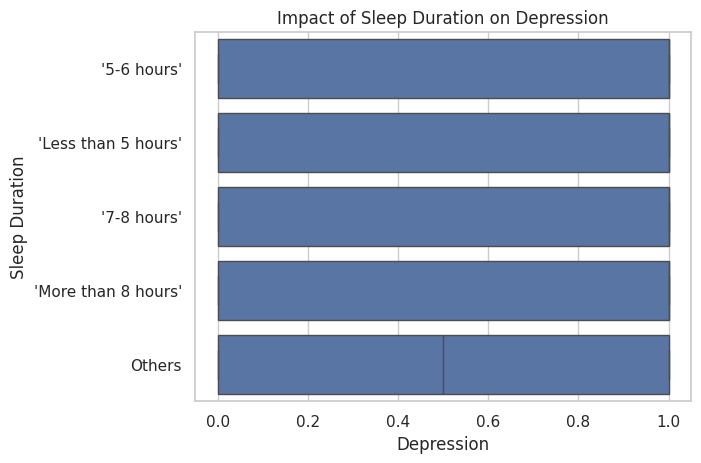

In [ ]:
sns.boxplot(x='Depression', y='Sleep Duration', data=df)
plt.title("Impact of Sleep Duration on Depression")
plt.show()


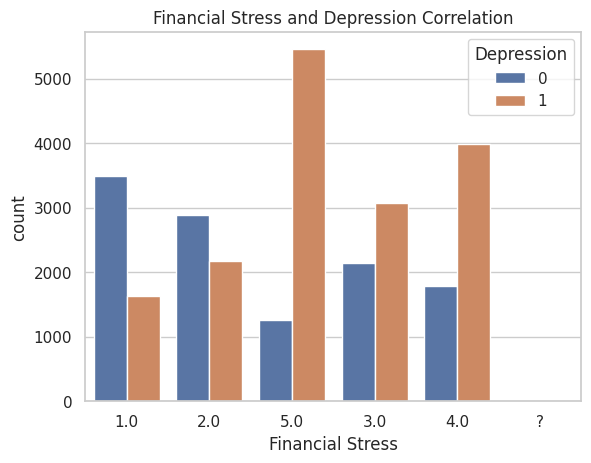

In [ ]:
sns.countplot(x='Financial Stress', hue='Depression', data=df)
plt.title("Financial Stress and Depression Correlation")
plt.show()


In [ ]:
df = df.drop(columns=['id'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Now, proceed with fitting the model
model = RandomForestClassifier()
model.fit(df.drop('Depression', axis=1), df['Depression'])
importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': df.drop('Depression', axis=1).columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.220119
4                       Academic Pressure    0.165371
14                       Financial Stress    0.096562
6                                    CGPA    0.088226
1                                     Age    0.081594
2                                    City    0.072635
13                       Work/Study Hours    0.070521
11                                 Degree    0.062777
7                      Study Satisfaction    0.042699
10                         Dietary Habits    0.034911
9                          Sleep Duration    0.033255
0                                  Gender    0.015755
15       Family History of Mental Illness    0.015168
3                              Profession    0.000342
8                        Job Satisfaction    0.000053
5                           Work Pressure    0.000010


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 83.64%
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

